In [2]:
import pandas as pd

# Pre-training data

In [61]:
# load data
pre_training = pd.read_parquet('../forgeting/experiments/attack_forg_plen/attack_forg_plen.parquet')

In [62]:
# create eval_sample from prefix_100 and suffix
pre_training['eval_sample'] = pre_training.apply(lambda x: x['prefix_100'] + x['suffix'], axis=1)
pre_training['index'] = pre_training.index

In [63]:
# pre_training[['index','eval_sample']].to_excel('./data/pre_train.xlsx', index=False)

# Fine-tuning

In [64]:
# load data g3
fine_tuning = pd.read_parquet('../memorization/experiments/attack_mem_dedup/attack_mem_dedup_3.parquet')

In [65]:
fine_tuning['eval_sample'] = fine_tuning.apply(lambda x: x['prefix_100'] + x['suffix'], axis=1)
fine_tuning['index'] = fine_tuning.index

In [66]:
# fine_tuning[['index','eval_sample']].to_excel('./data/fine_tune_3.xlsx', index=False)

# Data Analysis


In [67]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
pre_training = pd.read_parquet('../forgeting/experiments/attack_forg_plen/attack_forg_plen.parquet')

pre_train_labels = pd.read_csv('./data/pre_train_res.csv', names=['a', 'f'])
# to lower
pre_train_labels['a'] = pre_train_labels['a'].apply(lambda x: x.lower())
pre_train_labels['f'] = pre_train_labels['f'].apply(lambda x: x.lower())

pre_training['a'] = pre_train_labels['a']
pre_training['f'] = pre_train_labels['f']

pre_train_labels = pre_train_labels.drop(pre_train_labels[(pre_train_labels.a == 'u') | (pre_train_labels.f == 'u') ].index)

In [69]:
cohen_kappa_score(pre_train_labels['a'], pre_train_labels['f'])

0.8764316208688516

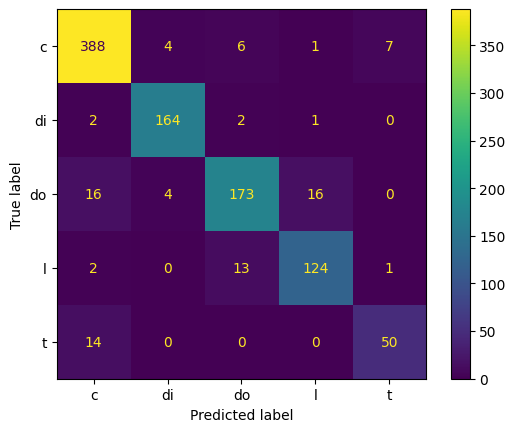

In [70]:
ConfusionMatrixDisplay.from_predictions(pre_train_labels['a'], pre_train_labels['f'])

In [71]:
fine_tuning = pd.read_parquet('../memorization/experiments/attack_mem_dedup/attack_mem_dedup_3.parquet')

fine_tuning_labels = pd.read_csv('./data/fine_tune_res.csv', names=['a', 'f'])
# to lower
fine_tuning_labels['a'] = fine_tuning_labels['a'].apply(lambda x: x.lower())
fine_tuning_labels['f'] = fine_tuning_labels['f'].apply(lambda x: x.lower())

fine_tuning['a'] = fine_tuning_labels['a']
fine_tuning['f'] = fine_tuning_labels['f']

fine_tuning_labels = fine_tuning_labels.drop(fine_tuning_labels[(fine_tuning_labels.a == 'u') | (fine_tuning_labels.f == 'u') ].index)

In [72]:
cohen_kappa_score(fine_tuning_labels['a'], fine_tuning_labels['f'])

0.8978552345073575

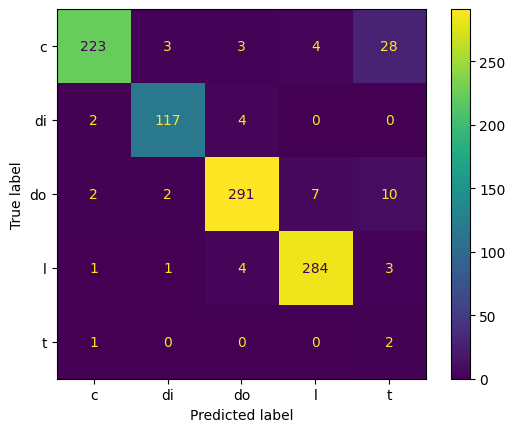

In [73]:
ConfusionMatrixDisplay.from_predictions(fine_tuning_labels['a'], fine_tuning_labels['f'])

# Remove the conflicts

## Pre-train

In [22]:
pre_training_a  = pd.read_csv('./data/ptrain-tags_rev_a.csv',index_col=0)
pre_training_b = pd.read_csv('./data/ptrain-tags_rev_b.csv',index_col=0)

pre_training_a['Cat'] = pre_training_a['Cat'].apply(lambda x: x.lower()) 
pre_training_b['Cat'] = pre_training_b['Cat'].apply(lambda x: x.lower()) 

In [23]:
ptrain_tags = pre_training_a
ptrain_tags['agree'] = ptrain_tags.apply(lambda x: 1 if x['Cat'] == pre_training_b.loc[x.name]['Cat'] else 0, axis=1)
pre_training = pd.read_parquet('../forgeting/experiments/attack_forg_plen/attack_forg_plen.parquet')
ptrain_tags = pre_training.join(ptrain_tags)


In [25]:
ptrain_tags.to_csv('./data/pre-train_tags.csv')

## Fine-tuning

In [29]:
fine_tune_a  = pd.read_csv('./data/ftune-tags_rev_a.csv',index_col=0)
fine_tune_b = pd.read_csv('./data/ftune-tags_rev_b.csv',index_col=0)

fine_tune_a['Cat'] = fine_tune_a['Cat'].apply(lambda x: x.lower()) 
fine_tune_b['Cat'] = fine_tune_b['Cat'].apply(lambda x: x.lower()) 

In [30]:
ftune_tags = fine_tune_a
ftune_tags['agree'] = ftune_tags.apply(lambda x: 1 if x['Cat'] == fine_tune_b.loc[x.name]['Cat'] else 0, axis=1)
fine_tuning = pd.read_parquet('../memorization/experiments/attack_mem_dedup/attack_mem_dedup_3.parquet')
ftune_tags = fine_tuning.join(ftune_tags)


In [31]:
ftune_tags.to_csv('./data/fine-tune_tags.csv')